In [1]:
### CODIGO PARA CONTEO RAPIDO ELECCIONES 2024

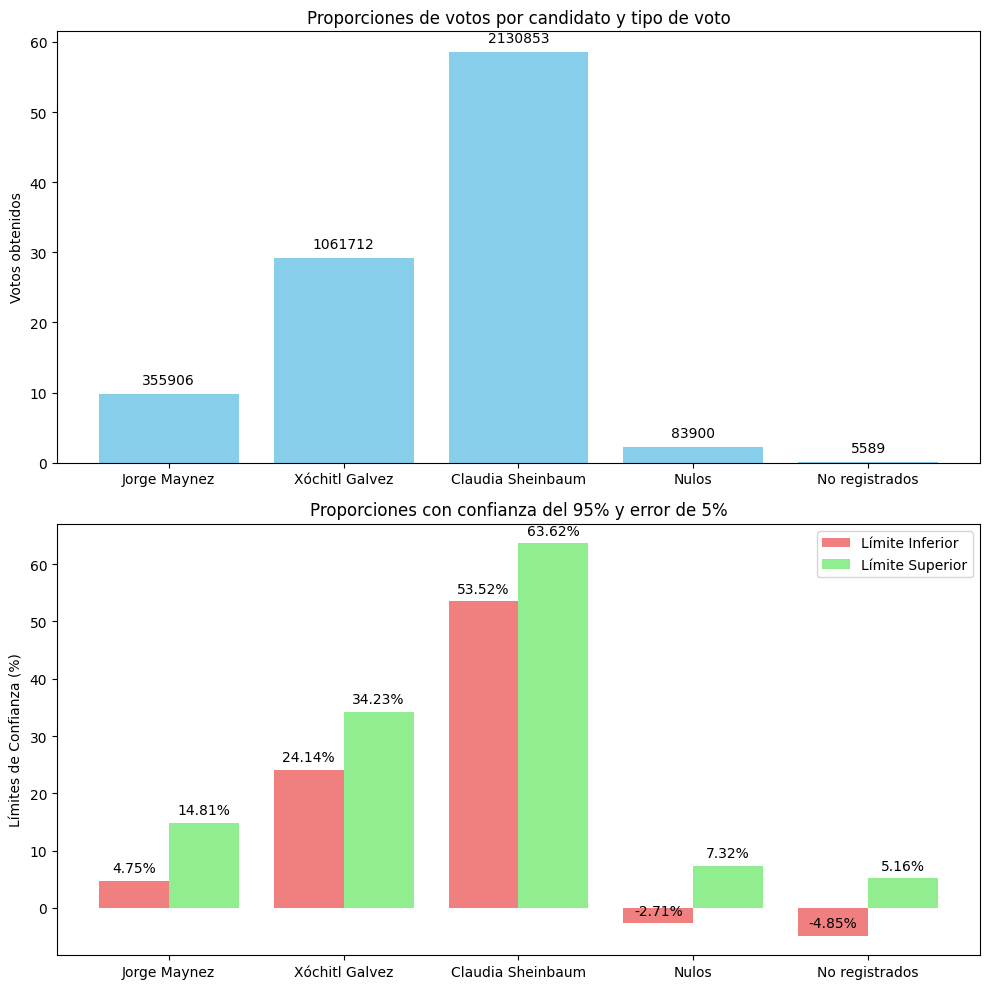

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos proporcionados
total_votos = 3637960
votos_A = 355906
votos_B = 1061712
votos_C = 2130853
votos_nulos = 83900
votos_no_registrados = 5589

# Cálculo de las proporciones muestrales
p_A = votos_A / total_votos
p_B = votos_B / total_votos
p_C = votos_C / total_votos
p_nulos = votos_nulos / total_votos
p_no_registrados = votos_no_registrados / total_votos

# Número total de votos en la muestra
n = total_votos

# Nivel de confianza y valor crítico (95% de confianza)
confianza = 0.95
z = norm.ppf(1 - (1 - confianza) / 2)

# Factor adicional para ampliar el margen de error
factor_adicional = 0.050  # 2.5% de cada lado, resultando en un 5% en total  0.025

# Función para calcular el error estándar y el intervalo de confianza
def calcular_ic(p, n, z, factor_adicional):
    se = np.sqrt(p * (1 - p) / n)
    ic_inferior = p - z * se - factor_adicional
    ic_superior = p + z * se + factor_adicional
    return se, ic_inferior, ic_superior

# Cálculo del error estándar y los intervalos de confianza
se_A, ic_A_inferior, ic_A_superior = calcular_ic(p_A, n, z, factor_adicional)
se_B, ic_B_inferior, ic_B_superior = calcular_ic(p_B, n, z, factor_adicional)
se_C, ic_C_inferior, ic_C_superior = calcular_ic(p_C, n, z, factor_adicional)
se_nulos, ic_nulos_inferior, ic_nulos_superior = calcular_ic(p_nulos, n, z, factor_adicional)
se_no_registrados, ic_no_registrados_inferior, ic_no_registrados_superior = calcular_ic(p_no_registrados, n, z, factor_adicional)

# Resultados
candidatos = ['Jorge Maynez', 'Xóchitl Galvez', 'Claudia Sheinbaum', 'Nulos', 'No registrados']
proporciones = [p_A, p_B, p_C, p_nulos, p_no_registrados]
ic_inferiores = [ic_A_inferior, ic_B_inferior, ic_C_inferior, ic_nulos_inferior, ic_no_registrados_inferior]
ic_superiores = [ic_A_superior, ic_B_superior, ic_C_superior, ic_nulos_superior, ic_no_registrados_superior]
votos = [votos_A, votos_B, votos_C, votos_nulos, votos_no_registrados]

# Convertir proporciones a porcentajes
proporciones = [p * 100 for p in proporciones]
ic_inferiores = [ic * 100 for ic in ic_inferiores]
ic_superiores = [ic * 100 for ic in ic_superiores]

# Graficar proporciones y límites de confianza
x = np.arange(len(candidatos))

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Gráfica de barras para las proporciones
bars = ax[0].bar(x, proporciones, color='skyblue', tick_label=candidatos)
ax[0].set_ylabel('Votos obtenidos')
ax[0].set_title('Proporciones de votos por candidato y tipo de voto')

# Agregar etiquetas de cantidad de votos en la parte superior de cada barra
for bar, voto in zip(bars, votos):
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{voto}', ha='center', va='bottom')

# Gráfica de barras para los límites de confianza
bars_inferiores = ax[1].bar(x - 0.2, ic_inferiores, 0.4)
bars_superiores = ax[1].bar(x + 0.2, ic_superiores, 0.4)
ax[1].bar(x - 0.2, ic_inferiores, 0.4, label='Límite Inferior', color='lightcoral')
ax[1].bar(x + 0.2, ic_superiores, 0.4, label='Límite Superior', color='lightgreen')
ax[1].set_ylabel('Límites de Confianza (%)')
ax[1].set_title('Proporciones con confianza del 95% y error de 5%')
ax[1].legend()

# Agregar etiquetas de porcentajes en la parte superior de cada barra de los límites de confianza
for bar, ic_inferior in zip(bars_inferiores, ic_inferiores):
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

for bar, ic_superior in zip(bars_superiores, ic_superiores):
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Cambiar las etiquetas del eje x para la gráfica de límites de confianza
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Jorge Maynez', 'Xóchitl Galvez', 'Claudia Sheinbaum', 'Nulos', 'No registrados'])

plt.tight_layout()
plt.show()